In [79]:
from __future__ import print_function, division
import os
import time
import torch
import torch.nn as nn
from  torch import optim 
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.nn.modules.loss import BCEWithLogitsLoss
import cv2
from torch.utils.data import Dataset, DataLoader
from torchvision import utils
from torchvision import transforms
from torchvision import models
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [80]:
final = pd.read_csv('mapping/final_dataset.csv')

In [81]:
final['banana'] = int(0)
final.loc[final['is_banana'] == True, 'banana'] = int(1)

In [82]:
final

,img_path,xmin,ymin,xmax,ymax,score,img_name,tile_index,tile_xmin,tile_ymin,...,site,X_g,Y_g,updated diameter,group,updated height,AGB,carbon,id,banana
0,Carlos_Vera_Guevara_RGB_3_0_8305_4000_12305.png,3332.557861,19.092411,3661.390137,364.616425,0.531211,Carlos_Vera_Guevara_RGB,3,0,8305,...,Carlos_Vera_Guevara_RGB,5298.555843,7709.844671,10.281385,banana,0.0,4.293300,1.674387,30,1
1,Carlos_Vera_Guevara_RGB_3_0_8305_4000_12305.png,3162.579834,2148.233398,3431.632324,2379.467041,0.511510,Carlos_Vera_Guevara_RGB,3,0,8305,...,Carlos_Vera_Guevara_RGB,5315.345160,8606.745732,13.528139,banana,0.0,7.702971,3.004159,112,1
2,Carlos_Vera_Guevara_RGB_3_0_8305_4000_12305.png,2893.605713,244.011108,3095.620605,451.257812,0.251310,Carlos_Vera_Guevara_RGB,3,0,8305,...,Carlos_Vera_Guevara_RGB,5228.142461,7935.770200,12.732366,banana,0.0,6.769828,2.640233,179,1
3,Carlos_Vera_Guevara_RGB_3_0_8305_4000_12305.png,2595.111084,1703.712402,2765.227295,1865.253418,0.217742,Carlos_Vera_Guevara_RGB,3,0,8305,...,Carlos_Vera_Guevara_RGB,4434.058601,8354.081799,9.867583,banana,0.0,3.933601,1.534104,93,1
4,Carlos_Vera_Guevara_RGB_10_7600_7600_11600_116...,249.691879,123.626862,439.557648,302.768402,0.282849,Carlos_Vera_Guevara_RGB,10,7600,7600,...,Carlos_Vera_Guevara_RGB,8257.952942,7554.538338,17.825312,banana,0.0,13.862143,5.406236,162,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4658,Nestor_Macias_RGB_10_7600_7600_11600_11600.png,32.623880,654.892212,242.778061,850.323608,0.397208,Nestor_Macias_RGB,10,7600,7600,...,Nestor_Macias_RGB,8928.995350,7706.132294,7.778540,cacao,2.1,7.015283,2.735960,175,0
4659,Nestor_Macias_RGB_10_7600_7600_11600_11600.png,905.988037,3196.281738,1131.675781,3427.410400,0.355852,Nestor_Macias_RGB,10,7600,7600,...,Nestor_Macias_RGB,9365.333689,8995.309621,6.843647,cacao,0.0,5.444228,2.123249,497,0
4660,Nestor_Macias_RGB_10_7600_7600_11600_11600.png,962.970642,1536.193237,1213.003906,1787.660645,0.331348,Nestor_Macias_RGB,10,7600,7600,...,Nestor_Macias_RGB,9180.659810,8052.282053,6.843647,cacao,0.0,5.444228,2.123249,201,0
4661,Nestor_Macias_RGB_10_7600_7600_11600_11600.png,295.310394,371.127441,523.021179,614.510498,0.323385,Nestor_Macias_RGB,10,7600,7600,...,Nestor_Macias_RGB,9107.213580,7434.890131,6.843647,cacao,0.0,5.444228,2.123249,400,0


In [83]:
train, trees_test = train_test_split(final, shuffle = True, random_state = 900, test_size = 0.2)

In [84]:
trees_train, trees_valid = train_test_split(train, shuffle = True, random_state = 900, test_size = 0.2)

In [85]:
trees_train

,img_path,xmin,ymin,xmax,ymax,score,img_name,tile_index,tile_xmin,tile_ymin,...,site,X_g,Y_g,updated diameter,group,updated height,AGB,carbon,id,banana
2594,Carlos_Vera_Arteaga_RGB_10_7600_7600_11600_116...,1693.608398,481.497467,1931.384033,727.073608,0.214639,Carlos_Vera_Arteaga_RGB,10,7600,7600,...,Carlos_Vera_Arteaga_RGB,7914.426211,6045.849783,7.957729,cacao,0.0,7.338873,2.862161,289,0
3413,Leonor_Aspiazu_RGB_5_3800_3800_7800_7800.png,5.647815,1101.918823,222.665421,1507.745605,0.336160,Leonor_Aspiazu_RGB,5,3800,3800,...,Leonor_Aspiazu_RGB,7115.040133,6661.056797,5.411255,fruit,0.0,6.697409,2.611989,568,0
1730,Carlos_Vera_Guevara_RGB_6_3800_7600_7800_11600...,1809.937744,1829.335938,1994.789429,2015.091553,0.225775,Carlos_Vera_Guevara_RGB,6,3800,7600,...,Carlos_Vera_Guevara_RGB,6414.282331,7998.190862,9.803922,fruit,0.0,32.158482,12.541808,481,0
948,Leonor_Aspiazu_RGB_7_3800_9855_7800_13855.png,803.905762,172.072067,1278.015137,590.960876,0.662122,Leonor_Aspiazu_RGB,7,3800,9855,...,Leonor_Aspiazu_RGB,5808.957972,8927.718438,17.029539,banana,0.0,12.577184,4.905102,91,1
360,Carlos_Vera_Arteaga_RGB_0_0_0_4000_4000.png,2598.971436,2738.038330,2903.955566,3040.416748,0.349348,Carlos_Vera_Arteaga_RGB,0,0,0,...,Carlos_Vera_Arteaga_RGB,5593.395677,3742.326178,15.915457,banana,0.0,10.889200,4.246788,143,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3290,Leonor_Aspiazu_RGB_11_7600_9855_11600_13855.png,368.091797,1028.851685,571.048889,1242.915771,0.278405,Leonor_Aspiazu_RGB,11,7600,9855,...,Leonor_Aspiazu_RGB,8668.005000,9789.995140,9.230965,other,0.0,20.499550,7.994824,197,0
1312,Nestor_Macias_RGB_6_3800_7600_7800_11600.png,899.546570,3162.471924,1241.997070,3505.245605,0.531690,Nestor_Macias_RGB,6,3800,7600,...,Nestor_Macias_RGB,6184.921425,9121.916925,13.177998,banana,0.0,7.284514,2.840961,50,1
3837,Manuel_Macias_RGB_3_3800_0_7800_4000.png,1506.457153,777.099976,1936.409302,1264.390503,0.312215,Manuel_Macias_RGB,3,3800,0,...,Manuel_Macias_RGB,7568.192741,3957.817923,4.300120,cacao,130.0,2.169494,0.846103,187,0
2546,Carlos_Vera_Arteaga_RGB_9_7600_3800_11600_7800...,704.804016,710.836914,861.127991,856.794861,0.286636,Carlos_Vera_Arteaga_RGB,9,7600,3800,...,Carlos_Vera_Arteaga_RGB,7929.606900,4223.707689,4.774637,timber,0.0,4.986170,1.944606,406,0


In [86]:
# make the training set
trees_train.to_csv('mapping/train.csv', index = False) 

In [87]:
# make the validation set
trees_valid.to_csv('mapping/valid.csv', index = False) 

In [88]:
# make the test set
trees_test.to_csv('mapping/test.csv', index = False) 

In [89]:
trees_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2984 entries, 2594 to 3117
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   img_path          2984 non-null   object 
 1   xmin              2984 non-null   float64
 2   ymin              2984 non-null   float64
 3   xmax              2984 non-null   float64
 4   ymax              2984 non-null   float64
 5   score             2984 non-null   float64
 6   img_name          2984 non-null   object 
 7   tile_index        2984 non-null   int64  
 8   tile_xmin         2984 non-null   int64  
 9   tile_ymin         2984 non-null   int64  
 10  tile_xmax         2984 non-null   int64  
 11  tile_ymax         2984 non-null   int64  
 12  x                 2984 non-null   float64
 13  y                 2984 non-null   float64
 14  Xmin              2984 non-null   float64
 15  Ymin              2984 non-null   float64
 16  Xmax              2984 non-null   float

In [90]:
trees_train['group'].value_counts()

cacao     1315
banana     981
fruit      465
other       94
timber      91
citrus      38
Name: group, dtype: int64

In [91]:
trees_train['site'].value_counts()

Carlos_Vera_Guevara_RGB    597
Flora_Pluas_RGB            565
Nestor_Macias_RGB          562
Leonor_Aspiazu_RGB         497
Carlos_Vera_Arteaga_RGB    462
Manuel_Macias_RGB          301
Name: site, dtype: int64

In [92]:
trees_valid['group'].value_counts()

cacao     311
banana    246
fruit     127
other      29
timber     19
citrus     14
Name: group, dtype: int64

In [94]:
trees_valid['site'].value_counts()

Carlos_Vera_Guevara_RGB    148
Nestor_Macias_RGB          142
Leonor_Aspiazu_RGB         134
Carlos_Vera_Arteaga_RGB    123
Flora_Pluas_RGB            120
Manuel_Macias_RGB           79
Name: site, dtype: int64

<Axes: >

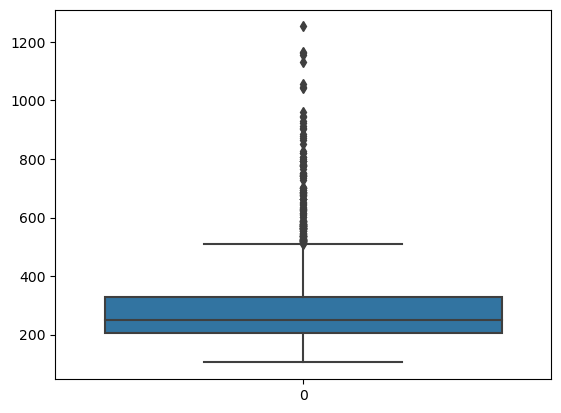

In [95]:
h = trees_train['ymax'].values - trees_train['ymin'].values

# Boxplot of bbox heights
sns.boxplot(h)

<Axes: >

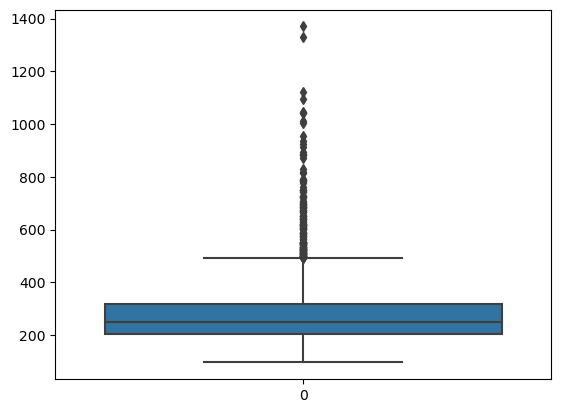

In [96]:
w = trees_train['xmax'].values - trees_train['xmin'].values

# Boxplot of bbox widths
sns.boxplot(w)

<Axes: >

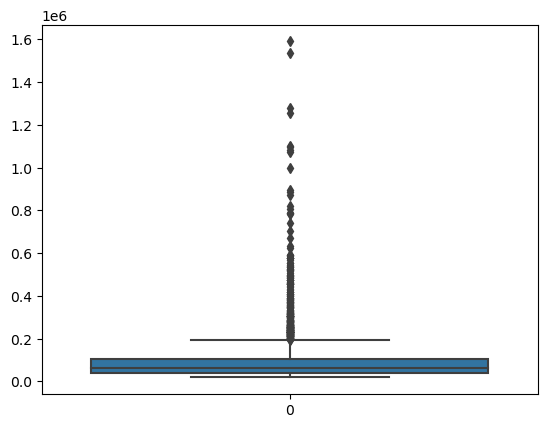

In [36]:
area = h * w

# Boxplot of bbox widths
sns.boxplot(area)
# Area can vary by 2 orders of magnitude, 
#we need to resize the images to be of similar sizes

In [97]:
trees_train.loc[trees_train['ymax'] - trees_train['ymin'] > 800]

,img_path,xmin,ymin,xmax,ymax,score,img_name,tile_index,tile_xmin,tile_ymin,...,site,X_g,Y_g,updated diameter,group,updated height,AGB,carbon,id,banana
4031,Manuel_Macias_RGB_6_7600_0_11600_4000.png,34.279026,1992.956543,1075.541626,3049.772217,0.738981,Manuel_Macias_RGB,6,7600,0,...,Manuel_Macias_RGB,8493.723327,4644.412781,2.387319,cacao,0.0,0.676596,0.263872,334,0
3598,Leonor_Aspiazu_RGB_12_11400_0_15400_4000.png,0.000000,1461.102417,881.562927,2593.463623,0.645339,Leonor_Aspiazu_RGB,12,11400,0,...,Leonor_Aspiazu_RGB,11239.835389,4940.944301,5.411255,cacao,0.0,3.419771,1.333711,350,0
3804,Manuel_Macias_RGB_3_3800_0_7800_4000.png,3153.790283,1802.551880,3827.784668,2611.012207,0.578749,Manuel_Macias_RGB,3,3800,0,...,Manuel_Macias_RGB,8357.363020,4239.207524,2.387319,cacao,0.0,0.676596,0.263872,165,0
4115,Manuel_Macias_RGB_11_9748_6879_13748_10879.png,6.354675,2897.293701,556.063232,3705.683350,0.509802,Manuel_Macias_RGB,11,9748,6879,...,Manuel_Macias_RGB,8774.441612,7706.363401,2.387319,cacao,0.0,0.676596,0.263872,297,0
3596,Leonor_Aspiazu_RGB_12_11400_0_15400_4000.png,2429.524902,1911.475708,3799.678955,3072.052979,0.771708,Leonor_Aspiazu_RGB,12,11400,0,...,Leonor_Aspiazu_RGB,13257.616314,5061.589025,5.411255,cacao,0.0,3.419771,1.333711,418,0
3145,Flora_Pluas_RGB_5_3800_0_7800_4000.png,1999.040771,2736.155762,2894.062988,3563.465820,0.591682,Flora_Pluas_RGB,5,3800,0,...,Flora_Pluas_RGB,6467.637678,6006.927870,5.252101,cacao,2.0,3.223490,1.257161,196,0
2762,Carlos_Vera_Arteaga_RGB_11_7600_11053_11600_15...,15.180535,2756.905029,344.096100,3635.473145,0.276416,Carlos_Vera_Arteaga_RGB,11,7600,11053,...,Carlos_Vera_Arteaga_RGB,5935.015024,10638.525734,4.774637,fruit,0.0,4.812853,1.877013,5,0
4406,Nestor_Macias_RGB_10_7600_7600_11600_11600.png,1340.169067,427.808594,2211.072754,1330.903931,0.519006,Nestor_Macias_RGB,10,7600,7600,...,Nestor_Macias_RGB,9657.636986,7279.376576,6.843647,cacao,0.0,5.444228,2.123249,425,0
2412,Carlos_Vera_Arteaga_RGB_2_0_7600_4000_11600.png,890.011719,2325.964844,1802.552612,3191.219238,0.293535,Carlos_Vera_Arteaga_RGB,2,0,7600,...,Carlos_Vera_Arteaga_RGB,4126.790336,8921.995690,7.957729,fruit,0.0,18.538871,7.230160,153,0
3803,Manuel_Macias_RGB_3_3800_0_7800_4000.png,0.000000,2651.604004,1003.727844,3904.439697,0.593140,Manuel_Macias_RGB,3,3800,0,...,Manuel_Macias_RGB,5716.531746,5619.699189,2.387319,fruit,0.0,0.772117,0.301126,326,0


In [98]:
trees_train.loc[trees_train['group']=='banana'].head()

,img_path,xmin,ymin,xmax,ymax,score,img_name,tile_index,tile_xmin,tile_ymin,...,site,X_g,Y_g,updated diameter,group,updated height,AGB,carbon,id,banana
948,Leonor_Aspiazu_RGB_7_3800_9855_7800_13855.png,803.905762,172.072067,1278.015137,590.960876,0.662122,Leonor_Aspiazu_RGB,7,3800,9855,...,Leonor_Aspiazu_RGB,5808.957972,8927.718438,17.029539,banana,0.0,12.577184,4.905102,91,1
360,Carlos_Vera_Arteaga_RGB_0_0_0_4000_4000.png,2598.971436,2738.038330,2903.955566,3040.416748,0.349348,Carlos_Vera_Arteaga_RGB,0,0,0,...,Carlos_Vera_Arteaga_RGB,5593.395677,3742.326178,15.915457,banana,0.0,10.889200,4.246788,143,1
1401,Nestor_Macias_RGB_11_7600_9024_11600_13024.png,529.013794,2134.678223,739.040771,2325.404053,0.266785,Nestor_Macias_RGB,11,7600,9024,...,Nestor_Macias_RGB,7959.166454,9251.114396,10.504202,banana,0.0,4.493912,1.752626,321,1
352,Carlos_Vera_Arteaga_RGB_13_11297_3800_15297_78...,1224.770630,1490.023438,1450.255859,1726.944214,0.245606,Carlos_Vera_Arteaga_RGB,13,11297,3800,...,Carlos_Vera_Arteaga_RGB,10569.324250,4174.689437,11.936593,banana,0.0,5.900332,2.301130,203,1
1088,Manuel_Macias_RGB_7_7600_3800_11600_7800.png,1476.201050,1155.567627,1816.207153,1519.975220,0.661135,Manuel_Macias_RGB,7,7600,3800,...,Manuel_Macias_RGB,9250.802947,4758.915808,24.191495,banana,0.0,26.565795,10.360660,33,1


In [99]:
n = 0
img_name = trees_train.iloc[n, 0]
print(img_name)

Carlos_Vera_Arteaga_RGB_10_7600_7600_11600_11600.png


In [100]:
df_img1 = trees_train.loc[trees_train['img_path'] == img_name]
tile1 = io.imread(os.path.join('tiles/all_tiles/', img_name))

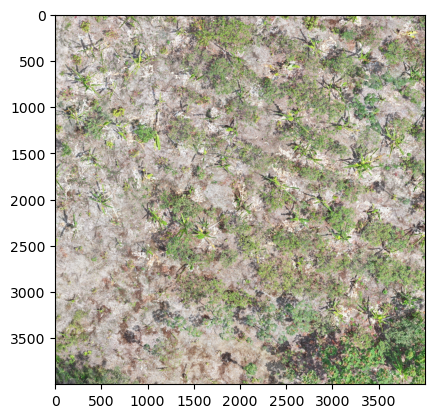

In [101]:
plt.imshow(tile1)
plt.show()

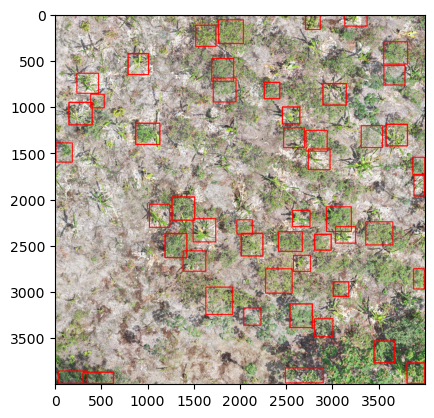

In [102]:
i = 0
for name in df_img1['img_path'].values:
    
    xmin = round(df_img1['xmin'].values[i])
    ymin = round(df_img1['ymin'].values[i])
    xmax = round(df_img1['xmax'].values[i])
    ymax = round(df_img1['ymax'].values[i])

    color = (255,0,0)
    
    tile1 = cv2.rectangle(tile1,(xmin,ymin),(xmax,ymax),color,10)
    
    i += 1
    #break

plt.imshow(tile1)   

In [103]:
def center_crop(img, dim):
	"""Returns center cropped image
	Args:
	img: image to be center cropped
	dim: dimensions (width, height) to be cropped
	"""
	width, height = img.shape[1], img.shape[0]

	# process crop width and height for max available dimension
	crop_width = dim[0] if dim[0]<img.shape[1] else img.shape[1]
	crop_height = dim[1] if dim[1]<img.shape[0] else img.shape[0] 
	mid_x, mid_y = int(width/2), int(height/2)
	cw2, ch2 = int(crop_width/2), int(crop_height/2) 
	crop_img = img[mid_y-ch2:mid_y+ch2, mid_x-cw2:mid_x+cw2]
	return crop_img

In [172]:
preprocess = transforms.Compose([
                     
                     #transforms.RandomResizedCrop(224),
                     transforms.ToTensor(),
                     transforms.Resize(224)
                     #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                ])

In [173]:
class Trees(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        """
        Arguments:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.trees_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.trees_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.trees_frame.iloc[idx, 0])
        image = io.imread(img_name)
        
        xmin = self.trees_frame.iloc[idx]['xmin']
        ymin = self.trees_frame.iloc[idx]['ymin']
        xmax = self.trees_frame.iloc[idx]['xmax']
        ymax = self.trees_frame.iloc[idx]['ymax']
        
        image = image[round(ymin):round(ymax)+1, round(xmin):round(xmax)+1]
        image = center_crop(image, [800, 800])
        
        border_height = round((800 - image.shape[0]) / 2)
        border_width  = round((800 - image.shape[1]) / 2)
        
        image = cv2.copyMakeBorder(image, border_height, border_height, border_width, border_width, cv2.BORDER_CONSTANT, None, value = 0)
        
        is_banana = self.trees_frame.iloc[idx]['banana']
        
        #image = Image.fromarray(image)
        
        #image = transforms.Resize(224)
        image = preprocess(image)

        
        sample = image, int(is_banana)

        if self.transform:
            sample = self.transform(sample)

        return sample

In [182]:
ttrain = Trees(csv_file='mapping/train.csv', root_dir='tiles/all_tiles')

In [183]:
imgs = torch.stack([img_t for img_t, _ in ttrain], dim=3)

KeyboardInterrupt: 

In [159]:
tvalid = Trees(csv_file='mapping/valid.csv',
                                    root_dir='tiles/all_tiles')

(array([9.14055159, 0.02941169, 0.08268694, 0.151136  , 0.17994604,
        0.17834177, 0.14511993, 0.0953875 , 0.04431806, 0.01510691]),
 array([0.        , 0.09938376, 0.19876751, 0.29815128, 0.39753503,
        0.4969188 , 0.59630257, 0.69568634, 0.79507005, 0.89445382,
        0.99383759]),
 <BarContainer object of 10 artists>)

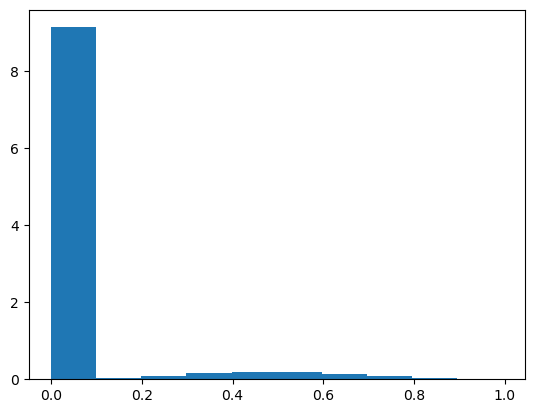

In [175]:
plt.hist(ttrain[0][0].ravel(), density=True)

(array([3.61540645e-02, 3.76838235e-05, 1.27369281e-04, 2.06719771e-04,
        3.35457516e-04, 4.73284314e-04, 6.08619281e-04, 5.75796569e-04,
        4.62622549e-04, 2.34068627e-04]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

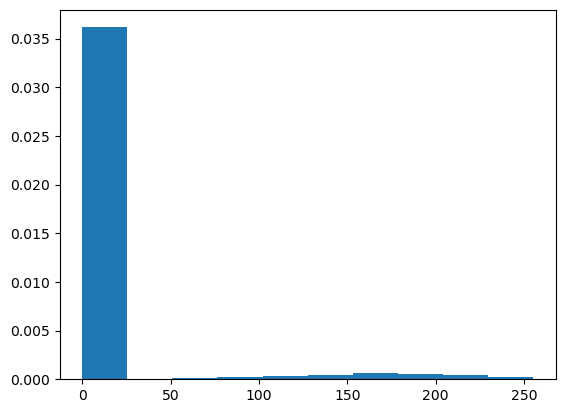

In [155]:
plt.hist(tvalid[0][0].ravel(), density=True)

is_banana: 1


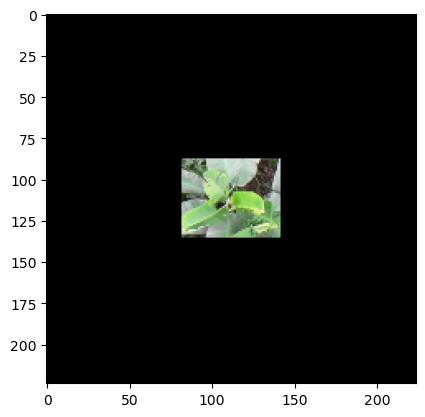

In [177]:
im, label = ttrain[947]
plt.imshow(im.permute(1,2,0))
print('is_banana:',label)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


is_banana: 0


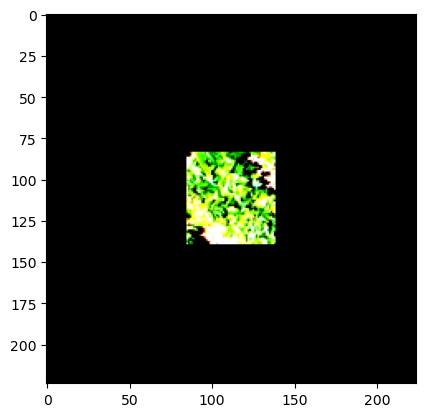

In [112]:
im, label = ttrain[2000]
plt.imshow(im.permute(1,2,0))
print('is_banana:',label)

In [113]:
for i in range(len(ttrain)):
    sample = ttrain[i]

    print(i, sample[0].shape, sample[1])

    if i == 3:
        break

0 torch.Size([3, 224, 224]) 0
1 torch.Size([3, 224, 224]) 0
2 torch.Size([3, 224, 224]) 0
3 torch.Size([3, 224, 224]) 1


In [ ]:
# Wrap it onto a dataloader

In [114]:
train_dataloader = DataLoader(ttrain, batch_size=32, shuffle=True)

In [115]:
valid_dataloader = DataLoader(tvalid, batch_size=32, shuffle=False)

In [116]:
print(len(train_dataloader), len(valid_dataloader))

94 24


In [117]:
print('Train dataset size:', len(ttrain))

Train dataset size: 2984


In [131]:
model = models.resnet18(pretrained=True)

In [132]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# Below, we train resnet18 for with our images

In [66]:
#def set_parameter_requires_grad(model, feature_extracting=True):
#    if feature_extracting:
#        for param in model.parameters():
#            param.requires_grad = False
            
#set_parameter_requires_grad(resnet18, False)

In [133]:
modelOutputFeats = model.fc.in_features
modelOutputFeats

512

In [134]:
# Initialize new final output layer
model.fc = nn.Linear(modelOutputFeats, 1)

In [135]:
# Check which layer in the model that will compute the gradient
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name)

conv1.weight
bn1.weight
bn1.bias
layer1.0.conv1.weight
layer1.0.bn1.weight
layer1.0.bn1.bias
layer1.0.conv2.weight
layer1.0.bn2.weight
layer1.0.bn2.bias
layer1.1.conv1.weight
layer1.1.bn1.weight
layer1.1.bn1.bias
layer1.1.conv2.weight
layer1.1.bn2.weight
layer1.1.bn2.bias
layer2.0.conv1.weight
layer2.0.bn1.weight
layer2.0.bn1.bias
layer2.0.conv2.weight
layer2.0.bn2.weight
layer2.0.bn2.bias
layer2.0.downsample.0.weight
layer2.0.downsample.1.weight
layer2.0.downsample.1.bias
layer2.1.conv1.weight
layer2.1.bn1.weight
layer2.1.bn1.bias
layer2.1.conv2.weight
layer2.1.bn2.weight
layer2.1.bn2.bias
layer3.0.conv1.weight
layer3.0.bn1.weight
layer3.0.bn1.bias
layer3.0.conv2.weight
layer3.0.bn2.weight
layer3.0.bn2.bias
layer3.0.downsample.0.weight
layer3.0.downsample.1.weight
layer3.0.downsample.1.bias
layer3.1.conv1.weight
layer3.1.bn1.weight
layer3.1.bn1.bias
layer3.1.conv2.weight
layer3.1.bn2.weight
layer3.1.bn2.bias
layer4.0.conv1.weight
layer4.0.bn1.weight
layer4.0.bn1.bias
layer4.0.conv2.we

In [129]:
def train_model(model, dataloaders, criterion, optimizer, device, num_epochs=5, is_train=True):
    since = time.time()
    model.to(device)
    
    #acc_history = []
    loss_history = []

    #best_acc = 0.0
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        running_loss = 0.0
        #running_corrects = 0

        # Iterate over data.
        for inputs, labels in dataloaders:
            #print(epoch)
            inputs = inputs.to(device)
            labels = labels.unsqueeze(1).int()
            labels = labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            #print(loss)

            #_, preds = torch.max(outputs, 1)

            # backward
            loss.backward()
            optimizer.step()

            # statistics
            running_loss += loss.item() * inputs.size(0)
            #running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(dataloaders.dataset)
        #epoch_acc = running_corrects.double() / len(dataloaders.dataset)

        print('Loss: {:.4f}'.format(epoch_loss))

        #if epoch_acc > best_acc:
        #    best_acc = epoch_acc

        #acc_history.append(epoch_acc.item())
        loss_history.append(epoch_loss)
        
        torch.save(model.state_dict(), os.path.join('/saved_models/', '{0:0=2d}.pth'.format(epoch)))

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    #print('Best Acc: {:4f}'.format(best_acc))
    
    return loss_history

In [136]:
# Here we only want to update the gradient for the classifier layer that we initialized.
params_to_update = []
for name,param in model.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)
            
#optimizer = optim.Adam(params_to_update)

	 conv1.weight
	 bn1.weight
	 bn1.bias
	 layer1.0.conv1.weight
	 layer1.0.bn1.weight
	 layer1.0.bn1.bias
	 layer1.0.conv2.weight
	 layer1.0.bn2.weight
	 layer1.0.bn2.bias
	 layer1.1.conv1.weight
	 layer1.1.bn1.weight
	 layer1.1.bn1.bias
	 layer1.1.conv2.weight
	 layer1.1.bn2.weight
	 layer1.1.bn2.bias
	 layer2.0.conv1.weight
	 layer2.0.bn1.weight
	 layer2.0.bn1.bias
	 layer2.0.conv2.weight
	 layer2.0.bn2.weight
	 layer2.0.bn2.bias
	 layer2.0.downsample.0.weight
	 layer2.0.downsample.1.weight
	 layer2.0.downsample.1.bias
	 layer2.1.conv1.weight
	 layer2.1.bn1.weight
	 layer2.1.bn1.bias
	 layer2.1.conv2.weight
	 layer2.1.bn2.weight
	 layer2.1.bn2.bias
	 layer3.0.conv1.weight
	 layer3.0.bn1.weight
	 layer3.0.bn1.bias
	 layer3.0.conv2.weight
	 layer3.0.bn2.weight
	 layer3.0.bn2.bias
	 layer3.0.downsample.0.weight
	 layer3.0.downsample.1.weight
	 layer3.0.downsample.1.bias
	 layer3.1.conv1.weight
	 layer3.1.bn1.weight
	 layer3.1.bn1.bias
	 layer3.1.conv2.weight
	 layer3.1.bn2.weight
	 layer

In [137]:
optimizer = torch.optim.Adam(model.fc.parameters())

In [138]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Setup the loss function
criterion = BCEWithLogitsLoss()

In [142]:
device

device(type='cuda')

In [148]:
train_loss = []
val_loss = []

epochs = 5

if torch.cuda.is_available():
    model.cuda()

for epoch in range(epochs):
      print("epoch {}/{}".format(epoch+1,epochs))
      running_loss = 0.0
      running_score = 0.0
#       model.train()
      for image,label in train_dataloader:
          print(epoch)
          image, label = image.to(device), label.to(device)
          label = label.unsqueeze(1)
          optimizer.zero_grad()
          y_pred = model.forward(image)
          loss = criterion(y_pred,label.float())         
          loss.backward() #calculate derivatives 
          optimizer.step() # update parameters
          val, index_ = torch.max(y_pred,axis=1)
          running_score += torch.sum(index_ == label.data).item()
          running_loss += loss.item()
      
      epoch_score = running_score/len(train_dataloader.dataset)
      epoch_loss = running_loss/len(train_dataloader.dataset)
      train_loss.append(epoch_loss)
      print("Training loss: {}, accuracy: {}".format(epoch_loss,epoch_score))
      
      with torch.no_grad():
          model.eval()
          running_loss = 0.0
          running_score = 0.0
          for image,label in valid_dataloader:
                image = image.to(device)
                label = label.to(device)
                label = label.unsqueeze(1)
                optimizer.zero_grad()
                y_pred = model.forward(image)
                loss = criterion(y_pred,label.float())
                running_loss += loss.item()

                val, index_ = torch.max(y_pred,axis=1)
                running_score += torch.sum(index_ == label.data).item()
          
          epoch_score = running_score/len(testloader.dataset)
          epoch_loss = running_loss/len(testloader.dataset)
          val_loss.append(epoch_loss)
          print("Validation loss: {}, accuracy: {}".format(epoch_loss,epoch_score))


epoch 1/5
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


KeyboardInterrupt: 